# Limpeza e tratamento de dados

Variáveis a serem tratadas

Aparência: Sol, Nublado e Chuva

Temperatus: -130 a 130 F

Umidade: 0 a 100

Vento: Falso/Verdadeiro

Jogar: Sim/Não

*Importando as bibliotecas*

In [2]:
import pandas as pd
import seaborn as srn
import statistics  as sts

*Importando os dados e visualizando as 5 primeiras linhas*

In [4]:

df = pd.read_csv("tempo.csv", sep=";")

df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


### Explorando dados categóricos


Agrupa os valores da coluna e verifica seu tamanho

In [5]:

grupo_aparencia = df.groupby(['Aparencia']).size()
grupo_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Verificando os dados em gráfico

<Axes: xlabel='Aparencia'>

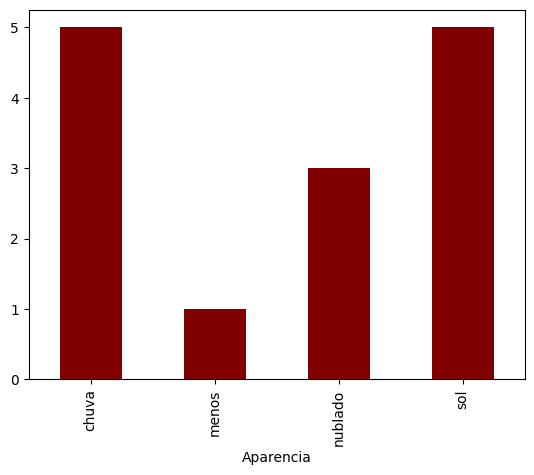

In [8]:
grupo_aparencia.plot.bar(color = 'maroon')

In [9]:

grupo_vento = df.groupby(['Vento']).size()
grupo_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

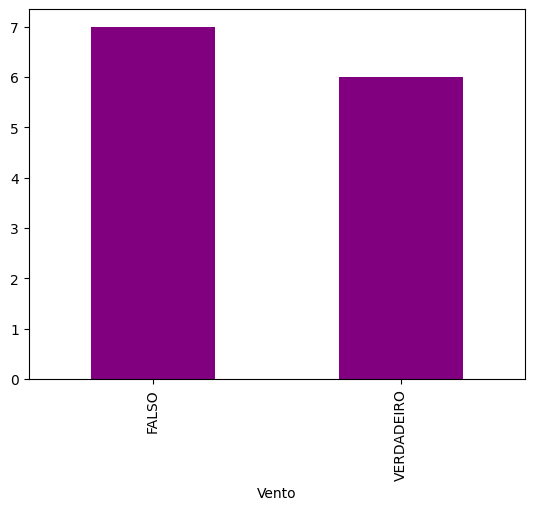

In [12]:
grupo_vento.plot.bar(color = 'purple')

In [13]:
#jogar
grupo_jogar = df.groupby(['Jogar']).size()
grupo_jogar

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

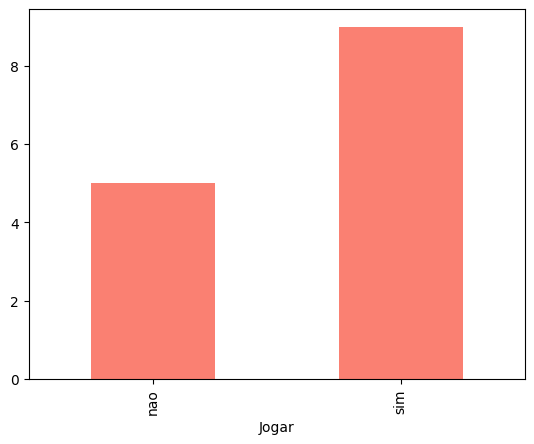

In [15]:
grupo_jogar.plot.bar(color = 'salmon')

### Explorando dados numéricos 

Verificando dados estatísticos da coluna Temperatura e Umidade e plotando gráficos para melhor visualização

In [16]:

df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

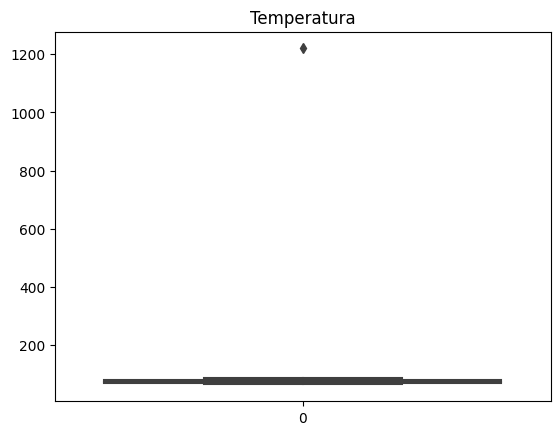

In [17]:
srn.boxplot(df['Temperatura']).set_title('Temperatura')

C:\Users\dncas\AppData\Local\Temp\ipykernel_10384\2291424763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(df['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

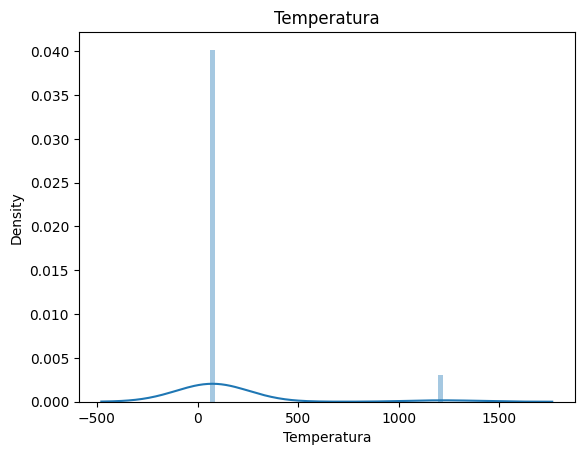

In [18]:
srn.distplot(df['Temperatura']).set_title('Temperatura')

In [19]:

df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

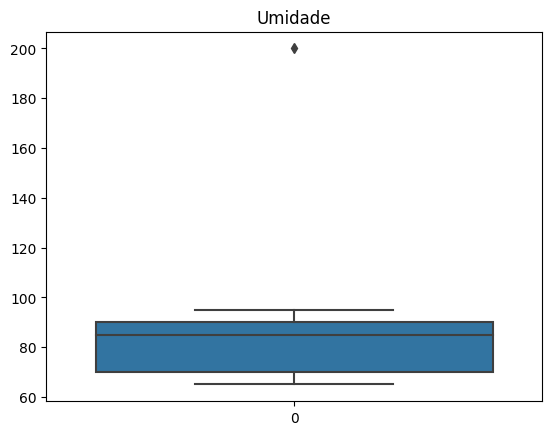

In [20]:
srn.boxplot(df['Umidade']).set_title('Umidade')

C:\Users\dncas\AppData\Local\Temp\ipykernel_10384\718507636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(df['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

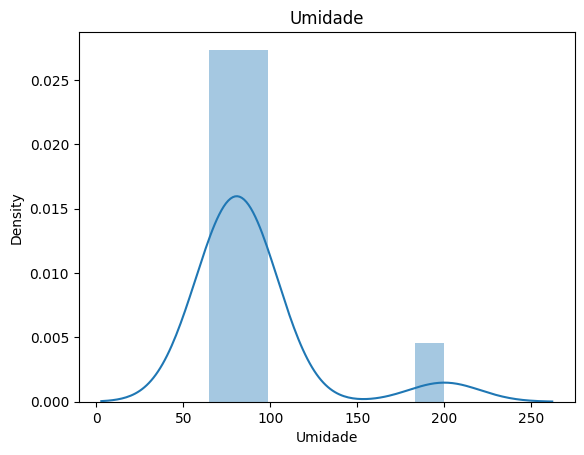

In [21]:
srn.distplot(df['Umidade']).set_title('Umidade')

Verificar se existem valores nulos no dataset e suas quantidade por coluna

In [22]:
#contamos valores NAN
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

### Realizando as Transformações Necessárias nos Dados

Verificando se existem problemas nos dados da coluna Aparência

In [23]:

aparencia = df.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Substituindo o valor 'menos' pela valor que é a moda da coluna 

In [24]:
df.loc[df['Aparencia'] ==  'menos', 'Aparencia'] = "Sol"
#visualiza o resultado
aparencia = df.groupby(['Aparencia']).size()
aparencia

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

Verifica se há valores fora do domínio [-130 a 130 F] na coluna Temperatura

In [25]:
 
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Localiza os valores que estão fora do domínio 

In [26]:
#visualizar 
df.loc[(df['Temperatura'] <  -130 )  | ( df['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


Calcula a mediana da coluna

In [27]:

mediana = sts.median(df['Temperatura'])
mediana

73.5

Substitui o valor que está fora do domínio da coluna pelo valor da mediana da coluna

In [28]:

df.loc[(df['Temperatura'] <  -130 )  | ( df['Temperatura'] >  130), 'Temperatura'] = mediana

Verifica se ainda existem temperaturas fora do domínio

In [29]:

df.loc[(df['Temperatura'] <  -130 )  | ( df['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Verifica os dados da coluna Umidade

In [30]:

umidade = df.groupby(['Umidade']).size()
umidade

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

Verifica o total de nulos da coluna Umidade

In [31]:

df['Umidade'].isnull().sum()

1

Calcula a mediana

In [32]:
mediana = sts.median(df['Umidade'])
mediana

85.5

Subsititui os valores nulos da coluna com a mediana dela

In [33]:
#preenche NAs
df['Umidade'].fillna(mediana, inplace=True)

Verifica novamente se não há mais NaN

In [34]:
df['Umidade'].isnull().sum()

0

Busca valor que está fora do dominio 

In [35]:

df.loc[(df['Umidade'] <  0 )  | ( df['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


Substitui pela mediana

In [37]:

df.loc[(df['Umidade'] <  0 )  | ( df['Umidade'] >  100), 'Umidade'] = mediana

Verifica se deu certo

In [38]:

df.loc[(df['Umidade'] <  0 )  | ( df['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Verifica coluna vento 

In [39]:

vento = df.groupby(['Vento']).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Verifica total de nulos na coluna

In [40]:

df['Vento'].isnull().sum()

1

Substitui o valor nulo pela moda

In [41]:

df['Vento'].fillna('FALSO', inplace=True)

Verifica se ainda restam nuls

In [42]:

df['Vento'].isnull().sum()

0

In [43]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,Sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
